In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
sequences_df = pd.read_csv('/Users/darylwilding-mcbride/Downloads/evidence-yhe-no-mbr.txt', sep='\\t', engine='python')

In [4]:
# remove decoys, which are indicated by a '+' in the Reverse column, and features with no intensity
sequences_df = sequences_df[pd.isna(sequences_df.Reverse) & (sequences_df.Intensity > 0) & pd.notnull(sequences_df['Modified sequence'])]

In [6]:
len(sequences_df.drop_duplicates(subset=['Modified sequence', 'Charge'], keep='first', inplace=False))

31923

In [8]:
sequences_df['group'] = sequences_df['Raw file'].apply(lambda x: x.split('_')[0])

#### analyse the YHE runs

In [9]:
yhe_only_df = sequences_df[(sequences_df.group == 'YHE211') | (sequences_df.group == 'YHE114')]

In [12]:
# count how many runs each sequence/charge was extracted from
sequence_occurences_l = []
for group_name,group_df in yhe_only_df.groupby(['Modified sequence','Charge'], as_index=False):
    sequence_occurences_l.append((group_name[0], group_name[1], len(group_df['Raw file'].unique())))
yhe_sequence_occurences_df = pd.DataFrame(sequence_occurences_l, columns=['sequence','charge','number_of_runs_extracted'])

In [14]:
number_of_yhe_runs_in_experiment = len(yhe_only_df['Raw file'].unique())
print('there are {} runs in the experiment'.format(number_of_yhe_runs_in_experiment))

there are 21 runs in the experiment


In [16]:
# display the number of missing values across the experiment
yhe_sequence_occurences_df['missing_files'] = number_of_yhe_runs_in_experiment - yhe_sequence_occurences_df.number_of_runs_extracted
proportion_of_missing_extractions = yhe_sequence_occurences_df.missing_files.sum() / (len(yhe_sequence_occurences_df) * number_of_yhe_runs_in_experiment)
print("{}% of values missing across the YHE runs.".format(round(proportion_of_missing_extractions*100)))

55.0% of values missing across the YHE runs.


In [18]:
len(yhe_only_df['Modified sequence'].unique())

23555

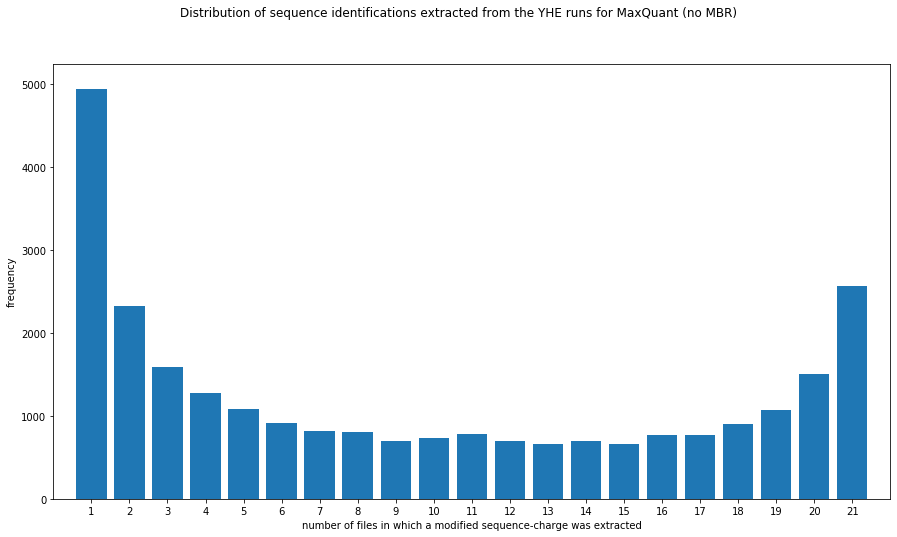

In [41]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.suptitle('Distribution of sequence identifications extracted from the YHE runs for MaxQuant (no MBR)')
# plt.title('total {} modified peptide sequences'.format(modified_sequences_count))

counts = np.bincount(yhe_sequence_occurences_df.number_of_runs_extracted)
ax1.bar(range(22), counts, width=0.8, align='center')
plt.xlabel('number of files in which a modified sequence-charge was extracted')
plt.ylabel('frequency')
ax1.set(xticks=range(1,22), xlim=[0, 22])
# plt.ylim((0,20000))

plt.show()

#### analyse the human-only runs

In [29]:
human_only_df = sequences_df[(sequences_df.group == 'YHE010')].copy()

In [30]:
# count how many runs each sequence/charge was extracted from
sequence_occurences_l = []
for group_name,group_df in human_only_df.groupby(['Modified sequence','Charge'], as_index=False):
    sequence_occurences_l.append((group_name[0], group_name[1], len(group_df['Raw file'].unique())))
human_sequence_occurences_df = pd.DataFrame(sequence_occurences_l, columns=['sequence','charge','number_of_runs_extracted'])

In [31]:
number_of_human_runs_in_experiment = len(human_only_df['Raw file'].unique())
print('there are {} human-only runs in the experiment'.format(number_of_human_runs_in_experiment))

there are 10 human-only runs in the experiment


In [32]:
# display the number of missing values across the experiment
human_sequence_occurences_df['missing_files'] = number_of_human_runs_in_experiment - human_sequence_occurences_df.number_of_runs_extracted
proportion_of_missing_extractions = human_sequence_occurences_df.missing_files.sum() / (len(human_sequence_occurences_df) * number_of_human_runs_in_experiment)
print("{}% of values missing across the experiment.".format(round(proportion_of_missing_extractions*100)))

49.0% of values missing across the experiment.


In [35]:
unique_sequences_human_df = human_only_df.drop_duplicates(subset=['Modified sequence', 'Charge'], keep='first', inplace=False).copy()

In [36]:
# how many are not human?
unique_sequences_human_df['human'] = unique_sequences_human_df['Proteins'].str.contains('HUMAN')

In [37]:
unique_sequences_human_df.human.value_counts()

True     20366
False      270
Name: human, dtype: int64

In [38]:
print('false positives: {}%'.format(round(len(unique_sequences_human_df[(unique_sequences_human_df.human == False)]) / len(unique_sequences_human_df) * 100.0, 1)))

false positives: 1.3%


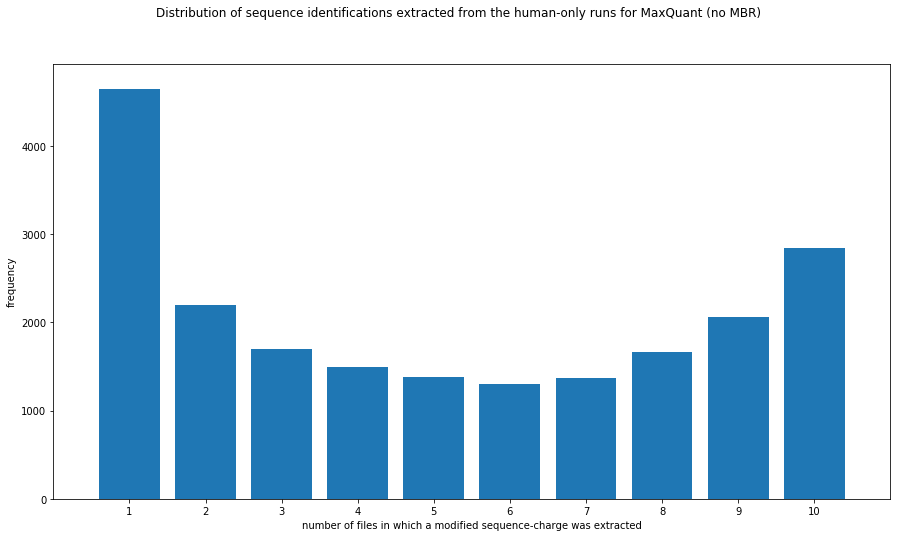

In [42]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.suptitle('Distribution of sequence identifications extracted from the human-only runs for MaxQuant (no MBR)')
# plt.title('total {} modified peptide sequences'.format(modified_sequences_count))

counts = np.bincount(human_sequence_occurences_df.number_of_runs_extracted)
ax1.bar(range(11), counts, width=0.8, align='center')
plt.xlabel('number of files in which a modified sequence-charge was extracted')
plt.ylabel('frequency')
ax1.set(xticks=range(1,11), xlim=[0, 11])
# plt.ylim((0,20000))

plt.show()